In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut, KFold, StratifiedKFold, GroupKFold

## Metrics for Evaluating Regression Model

* MSE, RMSE
$$\underbrace{E_{\mathbf{x}, y, D}\left[\left(h_D(\mathbf{x})-y\right)^2\right]}_{\text {Expected Tet Error }}=\underbrace{E_{\mathbf{x} \cdot D}\left[\left(h_D(\mathbf{x})-\bar{h}(\mathbf{x})\right)^2\right]}_{\text {Variance }}+\underbrace{E_{\mathbf{x}, y}\left[(\bar{y}(\mathbf{x})-y)^2\right]}_{\text {Noise }}+\underbrace{E_{\mathbf{x}}\left[(\bar{h}(\mathbf{x})-\bar{y}(\mathbf{x}))^2\right]}_{\text {Bias }}$$

* MAE
* [Coefficient of determination](https://online.stat.psu.edu/stat462/node/95/) $R^2$

## Univariate Linear Regression

In [164]:

y_true = np.array([1,2,3,4,5])
y_pred = np.array([1,2.5,3,4.9,4.9])

# MSE
print(mean_squared_error(y_true, y_pred))
print(np.sum((y_true-y_pred)**2) / len(y_true))


# r-sqaure
print(r2_score(y_true, y_pred))
numerator = np.sum( (y_true - y_pred) ** 2)
denominator = np.sum((y_true - np.average(y_true, axis=0,)) ** 2) 
print(1-numerator / denominator)
# print((np.corrcoef(y_true, y_pred)[0, 1]))



0.2140000000000001
0.2140000000000001
0.8929999999999999
0.8929999999999999


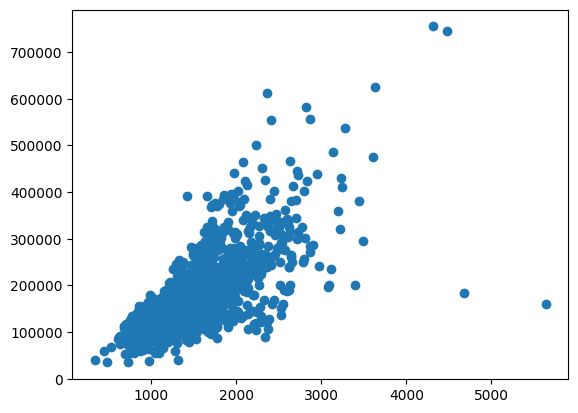

In [147]:
df = pd.read_csv("data/house-prices/train.csv") # from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
x = df['GrLivArea'] # Above grade (ground) living area square feet
y_ture = df['SalePrice']
# Create a scatter plot of the data points
plt.scatter(x, y_ture)


Does the formula look similar to covariance?

$$
\mathbf{w}=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{
\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
$$


In [165]:
# Calculate the slope using the closed-form formula
x_mean = np.mean(x)
y_mean = np.mean(y_true)
numerator = np.sum(np.multiply(x - x_mean, y - y_mean))
denominator = np.sum(np.power(x - x_mean, 2))
print("Slope: ", numerator/denominator)


Slope:  107.13035896582514


In [152]:
x.shape
# y_true.shape

(1460,)

In [166]:
# Numpy API
slope, intercept = np.polyfit(x, y_true, 1)
print("Slope: ", slope)
print("Intercept: ", intercept)

TypeError: expected x and y to have same length

In [153]:

# Sklearn API
my_model = LinearRegression()
my_model.fit(x.reshape(-1, 1), y_true)
print ("Slope: ", my_model.coef_[0])
print ("Intercept: ", my_model.intercept_)

# # Add the regression line to the plot
# plt.scatter(x, y)
# plt.plot(x, slope * x + intercept, color='red')

# # Set the title and labels for the plot
# plt.title('Regression Line Example')
# plt.xlabel('X Values')
# plt.ylabel('Y Values')

# # Show the plot
# plt.show()

AttributeError: 'Series' object has no attribute 'reshape'

## Multivariate Linear Regression

In [168]:
df = pd.read_csv("data/house-prices/train.csv")
df = df[ ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'SalePrice']] # Above grade (ground) living area square feet
df = df.dropna()
y_true = df['SalePrice'].to_numpy()
X = df[['GrLivArea', 'TotalBsmtSF', 'LotArea']].to_numpy()


$$
\mathbf{w}=\left(\mathbf{X}^T(\mathbf{X}-\overline{\mathbf{X}})\right)^{-1} \mathbf{X}^T(\mathbf{y}-\overline{\mathbf{y}})
$$

In [169]:
# Calculate the slope using the closed-form formula
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y_true)
numerator = np.dot(X.T, y_true - y_mean)
denominator = np.dot(X.T, X - X_mean)
slope = np.dot(np.linalg.inv(denominator), numerator)
print(slope)

# Sklearn API
my_model = LinearRegression()
my_model.fit(X, y_true)
y_pred = my_model.predict(X)
print(my_model.coef_)

[81.09962868 65.59032341  0.22461289]
[81.09962868 65.59032341  0.22461289]


**Can we use coefficients to evaluate the model?**
* [Feature Selection via Rescaled Linear Regressio](https://www.ijcai.org/proceedings/2017/0211.pdf)

In [170]:
####
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
###
my_model = LinearRegression()
my_model.fit(X, y_true)
# print (my_model.intercept_)
feature_cols = ['GrLivArea', 'TotalBsmtSF', 'LotArea']
for feat, coef  in zip(feature_cols, my_model.coef_):
    print(feat, coef)

    


GrLivArea 430476.8290482909
TotalBsmtSF 400756.8760479456
LotArea 48054.80544450978


See [More](https://www.quora.com/In-a-linear-regression-model-is-it-necessary-to-normalize-my-predictors-if-they-are-of-different-scales-some-are-percentages-while-others-are-continuous-variables-If-yes-how-do-I-interpret-the-results-after-the) for normalization in a linear regression model.

## Hyperparameter Tuning
Methods for Data Split
* Subsampling

* Corss Validation
    + KFold, GroupKFold
    + [Visualizing cross-validation behavior in scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)
    + [Caveats of Cross-validation](https://www.bing.com/search?q=7+cross+validation+mistaks&cvid=de14ffd0df5042cc883c14bea38f3da1&aqs=edge..69i57j0j69i11004.12424j0j4&FORM=ANAB01&PC=NSJS)
    
* [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html)

Train/test split by  `train_test_split`:
* By default, `train_test_split` splits the data into 75% training data and 25% test data which is a good rule of thumb.
* `stratify=y` makes sure that the labels to be distributed in train and test sets as they are in the original dataset.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

my_model = LinearRegression()
my_model.fit(X_train, y_train)
ypredicts = my_model.predict(X_test)
print(mean_squared_error(y_test, ypredicts))

104.91568499819532
104.91568499819532


In [174]:

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# kf = KFold(n_splits=2)
# print(list(kf.split(X)))

# gkf = GroupKFold(n_splits=2)
# print(list(gkf.split(X, groups=[0, 1, 0, 1])))

loo = LeaveOneOut()
print(list(loo.split(X)))


[(array([1, 2, 3]), array([0])), (array([0, 2, 3]), array([1])), (array([0, 1, 3]), array([2])), (array([0, 1, 2]), array([3]))]


Beyond regression
* Stratified subsampling
* StratifiedKFold Cross Validation

In [ ]:

# skf = StratifiedKFold(n_splits=2)
# y = np.array([1, 1, 2, 2])
# print(list(skf.split(X, y=y)))

## Pass Activity

In [ ]:
# Q1: Load the dataset from “sampleData.csv”.  Create training and test dataset using random splitting (70-30)%. Print the train and test data.
# Create a linear regression model and report the model performance. (The last feature is the target variable)



In [162]:
df_pass = pd.read_csv('data/sample_dataset.csv')
X = df_pass.iloc[:,2:-1].to_numpy()
y_true = df_pass.iloc[:,0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)
my_model = LinearRegression()
my_model.fit(X_train, y_train)
ypredicts = my_model.predict(X_test)
print(mean_squared_error(y_test, ypredicts))


104.91568499819532


In [ ]:
# Q2: Create training and test dataset using leave-one-out based on Subject ID. Print the train and test dataset for the first iteration only.
#   Create a linear regression model and compare the performance with Q-1. Explain your findings.

In [ ]:
# gkf = GroupKFold(n_splits=2)
# print(list(gkf.split(X, groups=[0, 1, 0, 1])))

In [ ]:
# Unique subject IDs in the sample dataset
subject_ids = df_pass["Subject ID"].unique()
print(subject_ids)

# Empty Dictionary that will be used to store training and test dataset
datasets = {}

# Creating the training and test dataset 
for id in subject_ids:
    datasets["X_train" + str(id)] = df_pass[df_pass["Subject ID"] != id].drop(["Subject ID", "sample ID",
                                                                                             "feature_31"], axis = 1)
    datasets["y_train" + str(id)] = df_pass[df_pass["Subject ID"] != id]["feature_31"]
    datasets["X_test" + str(id)] = df_pass[df_pass["Subject ID"] == id].drop(["Subject ID", "sample ID",
                                                                                            "feature_31"], axis = 1)
    datasets["y_test" + str(id)] = df_pass[df_pass["Subject ID"] == id]["feature_31"]

print(datasets)


# Create an instance of the LinearRegression
lin_reg = LinearRegression()
print(lin_reg)
mae_list = []
mse_list = []
rmse_list = []
for id in subject_ids:
    # Fit the linear regression model to the training data
    lin_reg.fit(datasets["X_train" + str(id)], datasets["y_train" + str(id)])
    # Evaluate the model using the test data
    y_test_pred = lin_reg.predict(datasets["X_test" + str(id)])
    mae = metrics.mean_absolute_error(datasets["y_test" + str(id)], y_test_pred)
    mse = metrics.mean_squared_error(datasets["y_test" + str(id)], y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(datasets["y_test" + str(id)], y_test_pred))
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    
# Average of the Mean Absolute Error 
average_mae = np.mean(mae_list)
print("The average of the Mean Absolute Error is", round(average_mae, 4))